In [2]:
!pip install ipywidgets

     -------------------------------------- 139.8/139.8 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 216.6/216.6 kB 6.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import joblib
import shap
from pathlib import Path
from sklearn.model_selection import train_test_split

# Load the feature set
project_root = Path.cwd()
features_path = project_root / 'data' / 'curated' / 'customer_features.parquet'
df_features = pd.read_parquet(features_path)

# Load the trained model
model_path = project_root / 'models' / 'artifacts' / 'churn_model_v1.joblib'
model = joblib.load(model_path)

# Re-split data to get the same test set we used for evaluation
X = df_features[['recency', 'frequency', 'monetary']]
y = df_features['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Model and data loaded successfully.")

Model and data loaded successfully.


In [2]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for our test set
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated.")

SHAP values calculated.


Global Feature Importance (Summary Plot):


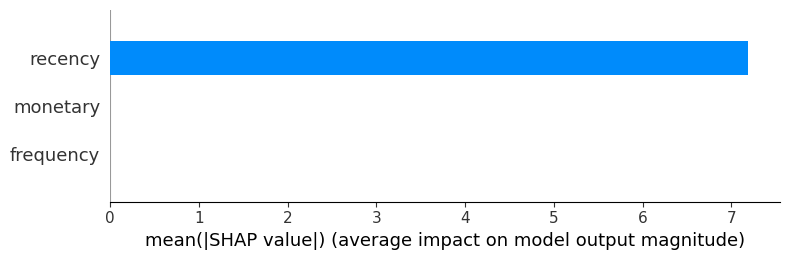

In [3]:
# Create a SHAP summary plot
print("Global Feature Importance (Summary Plot):")
shap.summary_plot(shap_values, X_test, plot_type="bar")

Feature Impact on Model Output (Beeswarm Plot):


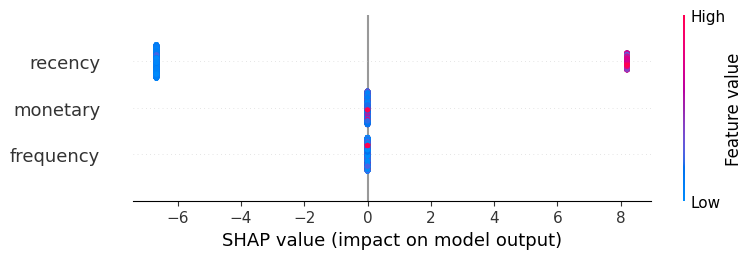

In [4]:
print("Feature Impact on Model Output (Beeswarm Plot):")
shap.summary_plot(shap_values, X_test)